# SVM classifier

In [75]:
from files_functions import *

## Generated Linear Non-Separable Data

In this section we are going to work with the generated dataset, we are going to do cross-validation in order to get the best hyperparameter for mu and also retrieve the hyperplane that separates data given the dual solution.

### PRIMAL FORMULATION

In [76]:
X_train, y_train = read_data('train.txt')
X_test, y_test = read_data('test.txt')

#### Cross-validation

In [77]:
nu = [0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [78]:
send_model_to_AMPL(X_tr, y_tr, nu, './AMPL/generated_dataset/primal.dat')

In [79]:
results = pd.DataFrame(columns=['nu', 'w', 'gamma', 'time', 'accuracy', 'fobj', 'iterations'])

dimensions = len(X_train.columns)
for i in range(1, len(nu)+1): 
    path = './AMPL/generated_dataset/outputs/optimal_parameters' + str(i) + '.csv'
    objective, iterations, time, w, gamma = get_parameters(path, dimensions)
    results.loc[i] = [nu[i-1], w, gamma, time, getAccuracy(w, gamma, X_val, y_val), objective, iterations]

In [80]:
results.sort_values(by=['accuracy'], ascending=False)

,nu,w,gamma,time,accuracy,fobj,iterations
1,0.2,"[2.40238, 2.62387, 2.53216, 2.53702]",-5.04632,0.031,0.965,73.094300,11
5,5.0,"[4.93088, 5.20789, 5.04108, 5.1451]",-10.12510,0.032,0.960,1298.611661,12
6,10.0,"[5.17755, 5.57903, 5.36178, 5.47677]",-10.74850,0.031,0.960,2541.839630,13
2,0.5,"[3.12696, 3.47124, 3.26131, 3.34381]",-6.54644,0.031,0.955,158.065001,12
3,1.0,"[3.75502, 3.96455, 3.9129, 3.99049]",-7.76127,0.032,0.955,290.649037,11
4,2.0,"[4.3733, 4.54846, 4.40654, 4.49477]",-8.84079,0.016,0.950,546.681647,11
7,20.0,"[5.27565, 5.68297, 5.48275, 5.54493]",-10.93710,0.015,0.950,5024.361762,11
8,50.0,"[5.32656, 5.72482, 5.54214, 5.58851]",-11.03660,0.031,0.950,12469.292950,11
9,100.0,"[5.33113, 5.72318, 5.54309, 5.59169]",-11.04000,0.031,0.950,24877.033280,12


In [81]:
# print(results.drop('w', axis=1).to_latex(index=False, float_format="%.4f"))

We select nu = 0.2 as is the one that achieves the highest accuracy. Now we have to train the SVM with all the training samples and evaluate its performance on the test data.

#### Results

In [82]:
send_model_to_AMPL(X_train, y_train, [0.2], './AMPL/generated_dataset/primal.dat')

In [83]:
final_results = pd.DataFrame(columns=['model', 'nu', 'w', 'gamma', 'time', 'accuracy', 'fobj', 'iterations'])
path = './AMPL/generated_dataset/outputs/optimal_parameters_def.csv'
objective, iterations, time, w, gamma = get_parameters(path, dimensions)
final_results.loc[0] = ["primal", 0.2, w, gamma, time, getAccuracy(w, gamma, X_test, y_test), objective, iterations]

final_results

,model,nu,w,gamma,time,accuracy,fobj,iterations
0,primal,0.2,"[2.57068, 2.90207, 2.86961, 2.60609]",-5.44081,0.031,0.916,86.523243,12


### DUAL FORMULATION

In [84]:
send_model_to_AMPL(X_train, y_train, [0.2], './AMPL/generated_dataset/dual.dat')

In [85]:
path = './AMPL/generated_dataset/outputs/optimal_parameters_dual.csv'
objective, iterations, time, w, gamma = get_parameters(path, dimensions)
final_results.loc[1] = ["dual", 0.2, w, gamma, time, getAccuracy(w, gamma, X_test, y_test), objective, iterations]
final_results

,model,nu,w,gamma,time,accuracy,fobj,iterations
0,primal,0.2,"[2.57068, 2.90207, 2.86961, 2.60609]",-5.44081,0.031,0.916,86.523243,12
1,dual,0.2,"[2.57068, 2.90207, 2.86961, 2.60609]",-5.44081,1.000,0.916,86.523243,17


In [86]:
# print(final_results.drop('w', axis=1).to_latex(index=False, float_format="%.4f"))

### DIABETES PREDICTION DATASET

In [87]:
Xdiab_train, ydiab_train = read_data2('diabetes.csv')
Xdiab_train, Xdiab_test, ydiab_train, ydiab_test = train_test_split(Xdiab_train, ydiab_train, test_size=0.2, random_state=42)

In [88]:
Xdiab_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21.0
618,9.0,112.0,82.0,24.0,0.0,28.2,1.282,50.0
346,1.0,139.0,46.0,19.0,83.0,28.7,0.654,22.0
294,0.0,161.0,50.0,0.0,0.0,21.9,0.254,65.0
231,6.0,134.0,80.0,37.0,370.0,46.2,0.238,46.0


In [89]:
# print(Xdiab_train.head().to_latex(index=False, float_format="%.1f"))

#### Cross-validation

In [90]:
Xdiab_tr, Xdiab_val, ydiab_tr, ydiab_val = train_test_split(Xdiab_train, ydiab_train, test_size=0.2, random_state=42)

In [91]:
send_model_to_AMPL(Xdiab_tr, ydiab_tr, nu, './AMPL/internet_dataset/primal.dat')

In [92]:
results_diab = pd.DataFrame(columns=['nu', 'w', 'gamma', 'time', 'accuracy', 'fobj', 'iterations'])

dimensions = len(Xdiab_tr.columns)
for i in range(1, len(nu)+1): 
    path = './AMPL/internet_dataset/outputs/optimal_parameters' + str(i) + '.csv'
    objective, iterations, time, w, gamma = get_parameters(path, dimensions)
    results_diab.loc[i] = [nu[i-1], w, gamma, time, getAccuracy(w, gamma, Xdiab_val, ydiab_val), objective, iterations]

In [93]:
results_diab.sort_values(by=['accuracy'], ascending=False)

,nu,w,gamma,time,accuracy,fobj,iterations
1,0.2,"[0.0303679, 0.0262939, -0.0163628, 0.00607573,...",-6.78354,0.032,0.788618,51.064898,19
2,0.5,"[0.0283437, 0.0254662, -0.0144511, 0.00527864,...",-6.66539,0.031,0.788618,127.467728,23
3,1.0,"[0.0280397, 0.0254467, -0.0144978, 0.00531413,...",-6.65655,0.032,0.788618,254.769092,23
4,2.0,"[0.0275232, 0.0254679, -0.014746, 0.00528145, ...",-6.64520,0.031,0.788618,509.367236,21
5,5.0,"[0.0271246, 0.0255262, -0.0150568, 0.00525715,...",-6.64298,0.031,0.788618,1273.140672,19
6,10.0,"[0.0271246, 0.0255262, -0.0150568, 0.00525715,...",-6.64298,0.031,0.788618,2546.093594,18
7,20.0,"[0.0271246, 0.0255262, -0.0150568, 0.00525715,...",-6.64298,0.016,0.788618,5091.999404,18
8,50.0,"[0.0271246, 0.0255262, -0.0150568, 0.00525715,...",-6.64298,0.016,0.788618,12729.716870,18
9,100.0,"[0.0271246, 0.0255262, -0.0150568, 0.00525715,...",-6.64298,0.015,0.788618,25459.245960,19


We get that the best accuracy is obtained for nu = 0.2, so we will use this value for the final model.

In [94]:
# print(results_diab.drop('w', axis=1).to_latex(index=False, float_format="%.4f"))

#### Results

In [95]:
send_model_to_AMPL(Xdiab_train, ydiab_train, [0.2], './AMPL/internet_dataset/primal.dat')

In [96]:
final_results_diab = pd.DataFrame(columns=['model', 'nu', 'w', 'gamma', 'time', 'accuracy', 'fobj', 'iterations'])
path = './AMPL/internet_dataset/outputs/optimal_parameters_def.csv'
objective, iterations, time, w, gamma = get_parameters(path, dimensions)
final_results_diab.loc[0] = ["primal", 0.2, w, gamma, time, getAccuracy(w, gamma, Xdiab_test, ydiab_test), objective, iterations]

final_results_diab

,model,nu,w,gamma,time,accuracy,fobj,iterations
0,primal,0.2,"[0.0571232, 0.0277269, -0.0124376, -0.00084026...",-6.58175,0.031,0.753247,63.121725,22


#### DUAL FORMULATION

In [97]:
send_model_to_AMPL(Xdiab_train, ydiab_train, [0.2], './AMPL/internet_dataset/dual.dat')

In [98]:
path = './AMPL/internet_dataset/outputs/optimal_parameters_dual.csv'
objective, iterations, time, w, gamma = get_parameters(path, dimensions)
final_results_diab.loc[1] = ["dual", 0.2, w, gamma, time, getAccuracy(w, gamma, Xdiab_test, ydiab_test), objective, iterations]
final_results_diab

,model,nu,w,gamma,time,accuracy,fobj,iterations
0,primal,0.2,"[0.0571232, 0.0277269, -0.0124376, -0.00084026...",-6.58175,0.031,0.753247,63.121725,22
1,dual,0.2,"[0.0571232, 0.0277269, -0.0124376, -0.00084026...",-6.58175,0.469,0.753247,63.121725,18


In [99]:
w

[0.0571232,
 0.0277269,
 -0.0124376,
 -0.000840264,
 -0.00127173,
 0.0724334,
 0.400345,
 0.0251289]

In [100]:
# print(final_results_diab.drop('w', axis=1).to_latex(index=False, float_format="%.4f"))

## Nonseparable dataset: kernel trick

In [101]:
from sklearn.datasets import make_swiss_roll

Xk, yk = make_swiss_roll(n_samples=1000, noise=0.0, random_state=42)
Xk = pd.DataFrame(Xk).astype(float)
yk = np.where(yk > yk.mean(), 1, -1)
yk = pd.DataFrame(yk).astype(float)

In [102]:
Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk, yk, test_size=0.2, random_state=42)

In [103]:
send_model_to_AMPL(Xk_train, yk_train, [1], './AMPL/kernel_dataset/dual_gaussian.dat', kernel=True)
send_model_to_AMPL(Xk_train, yk_train, [1], './AMPL/kernel_dataset/dual.dat')
send_test_to_AMPL(Xk_test, './AMPL/kernel_dataset/test.dat')

In [104]:
predictions = pd.read_csv('./AMPL/kernel_dataset/outputs/predictions.csv', header=None)
predictions = predictions.apply(lambda x: x.str.split(' ').str[-1])
predictions = predictions.applymap(lambda x: np.sign(float(x)))
predictions.head()

,0
0,-1.0
1,1.0
2,-1.0
3,-1.0
4,1.0


#### Accuracy: gaussian kernel vs lineal kernel

In [105]:
accuracy = pd.DataFrame(columns=['kernel','nu', 'w', 'gamma','accuracy', 'time', 'fobj', 'iterations'])

In [106]:
objective, iterations, time, gamma = get_parameters2('./AMPL/kernel_dataset/outputs/optimal_parameters_gaussian.csv')
yk_test = yk_test.reset_index(drop=True)
accuracy.loc[0] = ["Gaussian", 1, "cannot be found", gamma, str((predictions == yk_test).sum().sum() / (yk_test.shape[0] * yk_test.shape[1])*100) + "%", time, objective, iterations]

In [107]:
objective, iterations, time, wk, gamma_k = get_parameters('./AMPL/kernel_dataset/outputs/optimal_parameters_dual.csv', Xk_train.shape[1])
predictions = np.sign(np.dot(Xk_test, wk) + gamma_k)
predictions = pd.DataFrame(predictions)
accuracy.loc[1] = ["Linear", 1, wk, gamma_k, str((predictions == yk_test).sum().sum() / (yk_test.shape[0] * yk_test.shape[1])*100) + "%", time, objective, iterations]

In [108]:
accuracy

,kernel,nu,w,gamma,accuracy,time,fobj,iterations
0,Gaussian,1,cannot be found,0.274066,100.0%,1.234,36.106179,19
1,Linear,1,"[0.0334685, 0.00486892, -0.112087]",-0.171039,60.0%,0.531,645.015540,15


In [109]:
# print(accuracy.to_latex(index=False, float_format="%.4f"))

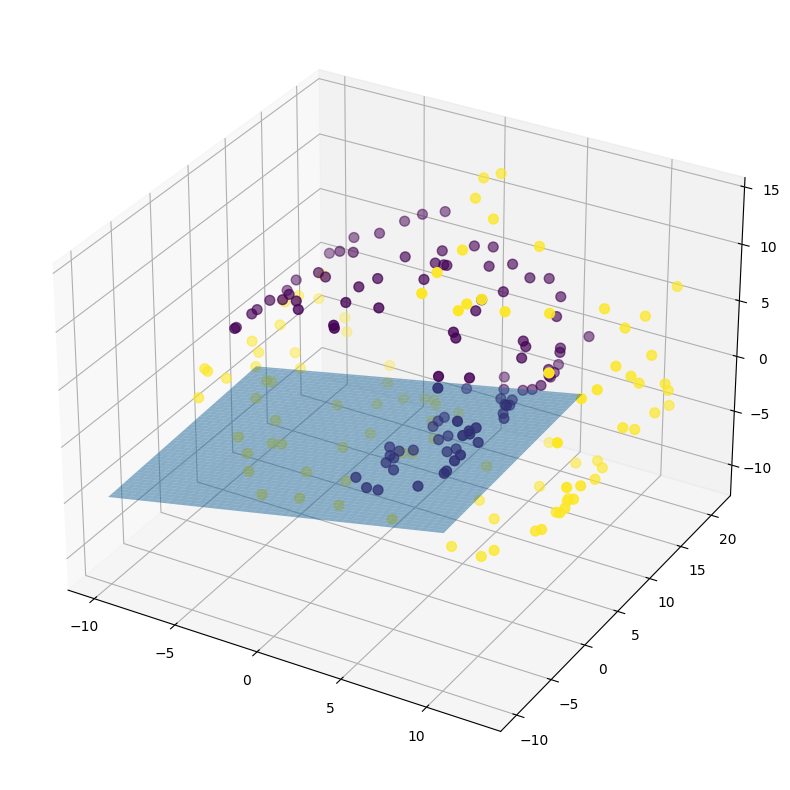

In [110]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = (-wk[0]*X - wk[1]*Y - gamma_k)/wk[2]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.scatter(Xk_test[0], Xk_test[1], Xk_test[2], c=yk_test[0], s=50, cmap='viridis')
plt.show()